<a href="https://colab.research.google.com/github/Aravindkumar-Rajendran/EVA/blob/master/Assignment_6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

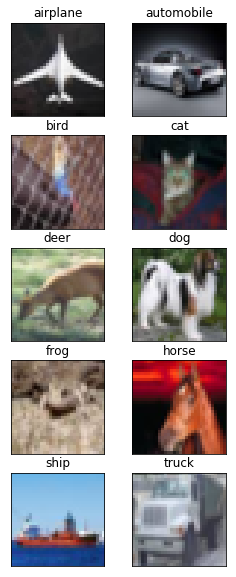

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(4,10))
for i in range(num_classes):
    ax = fig.add_subplot(5, 2, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_17 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 10s 27ms/step - loss: 1.8598 - acc: 0.2852 - val_loss: 1.5195 - val_acc: 0.4370
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3590 - acc: 0.5093 - val_loss: 1.1396 - val_acc: 0.5898
Epoch 3/100
390/390 [==============================] - 9s 24ms/step - loss: 1.1252 - acc: 0.6049 - val_loss: 0.9975 - val_acc: 0.6429
Epoch 4/100
390/390 [==============================] - 9s 24ms/step - loss: 0.9824 - acc: 0.6574 - val_loss: 0.8515 - val_acc: 0.7058
Epoch 5/100
390/390 [==============================] - 9s 24ms/step - loss: 0.8897 - acc: 0.6921 - val_loss: 0.7873 - val_acc: 0.7327
Epoch 6/100
390/390 [==============================] - 9s 24ms/step - loss: 0.8128 - acc: 0.7201 - val_loss: 0.7900 - val_acc: 0.7300
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7601 - acc: 0.7400 - val_loss: 0.6914 - val_acc: 0.7635
Epoch 8/100
390/390 [==============================] - 9s 23m

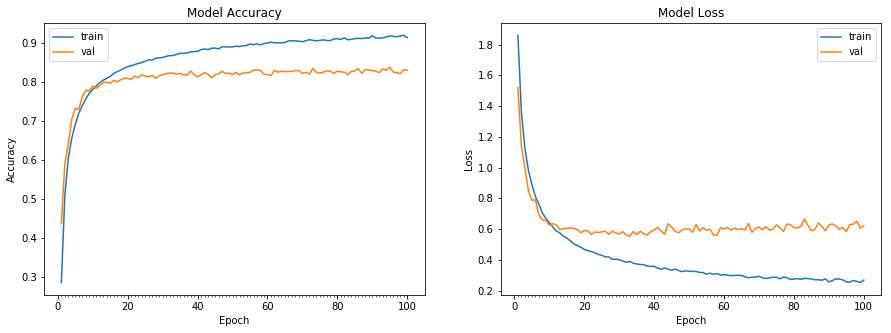

Accuracy on test data is: 83.05


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
num_classes = 10

from keras.layers import GlobalAveragePooling2D, Convolution2D, Dropout, Activation, MaxPooling2D, BatchNormalization
from keras.models import Sequential
# Define the model
modl = Sequential()

modl.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3)))#3
modl.add(Activation('relu'))
modl.add(Dropout(0.25))
modl.add(BatchNormalization())
         
modl.add(Convolution2D(64, 3, 3))#5
modl.add(Activation('relu'))        
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(128, 3, 3))#7
modl.add(Activation('relu'))        
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(32, 1, 1))
modl.add(MaxPooling2D(pool_size=(2, 2)))#14
modl.add(BatchNormalization())


modl.add(Convolution2D(64, 3, 3, border_mode='same'))#16
modl.add(Activation('relu'))
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(128, 3, 3))#18
modl.add(Activation('relu'))
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(256, 3, 3))#20
modl.add(Activation('relu'))        
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(32, 1, 1))
modl.add(MaxPooling2D(pool_size=(2, 2)))#40
modl.add(BatchNormalization())

modl.add(Convolution2D(64, 3, 3, border_mode='same'))#42
modl.add(Activation('relu'))
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(128, 3, 3))#44
modl.add(Activation('relu'))
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(256, 3, 3))#46
modl.add(Activation('relu'))        
modl.add(Dropout(0.25))

modl.add(Convolution2D(10, 1, 1))
modl.add(GlobalAveragePooling2D())
modl.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_

In [0]:
modl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_22 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 30, 30, 64)        0         
__________

In [0]:
# Compile the model
modl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

import time
# train the model
start = time.time()
# Train the model
modl_info = modl.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(modl_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, modl))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=80)`
  


Epoch 1/80
390/390 [==============================] - 29s 74ms/step - loss: 1.6746 - acc: 0.3950 - val_loss: 2.1897 - val_acc: 0.3313
Epoch 2/80
390/390 [==============================] - 26s 67ms/step - loss: 1.2510 - acc: 0.5487 - val_loss: 1.4926 - val_acc: 0.4992
Epoch 3/80
390/390 [==============================] - 26s 66ms/step - loss: 1.0582 - acc: 0.6218 - val_loss: 1.2633 - val_acc: 0.5738
Epoch 4/80
390/390 [==============================] - 26s 66ms/step - loss: 0.9174 - acc: 0.6720 - val_loss: 1.0810 - val_acc: 0.6370
Epoch 5/80
390/390 [==============================] - 26s 67ms/step - loss: 0.8230 - acc: 0.7101 - val_loss: 0.9464 - val_acc: 0.6669
Epoch 6/80
390/390 [==============================] - 26s 66ms/step - loss: 0.7645 - acc: 0.7311 - val_loss: 1.1878 - val_acc: 0.5952
Epoch 7/80
390/390 [==============================] - 26s 66ms/step - loss: 0.7133 - acc: 0.7495 - val_loss: 0.7710 - val_acc: 0.7350
Epoch 8/80
390/390 [==============================] - 26s 66ms